# Scraping Data with API

In this notebook, I am going to use an api to acquire the price of crypto currency.

In [25]:
import requests

def fetch_ohlcv():
    url = "https://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_ETH_BTC/history?period_id=1MTH&time_start=2023-03-01T00:00:00"
    headers = { "X-CoinAPI-Key": "FFD9412B-3FA7-4E6A-BD71-6B0188752A30" }

    response = requests.get(url, headers=headers)

    # Check if the response is successful
    if response.status_code == 200:
        if response.content:
            return response.json()
        else:
            print("Response is empty.")
            return None
    else:
        # Handle other HTTP status codes
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None
    
print(fetch_ohlcv())

[{'time_period_start': '2023-03-01T00:00:00.0000000Z', 'time_period_end': '2023-04-01T00:00:00.0000000Z', 'time_open': '2023-03-01T00:00:00.6310000Z', 'time_close': '2023-03-31T23:59:59.4690000Z', 'price_open': 0.069371, 'price_high': 0.073544, 'price_low': 0.062226, 'price_close': 0.063987, 'volume_traded': 3220044.1885, 'trades_count': 6650035}, {'time_period_start': '2023-04-01T00:00:00.0000000Z', 'time_period_end': '2023-05-01T00:00:00.0000000Z', 'time_open': '2023-04-01T00:00:01.7100000Z', 'time_close': '2023-05-01T00:00:00.9060000Z', 'price_open': 0.063987, 'price_high': 0.070928, 'price_low': 0.062037, 'price_close': 0.063978, 'volume_traded': 2371947.081, 'trades_count': 4990637}, {'time_period_start': '2023-05-01T00:00:00.0000000Z', 'time_period_end': '2023-06-01T00:00:00.0000000Z', 'time_open': '2023-05-01T00:00:00.0860000Z', 'time_close': '2023-05-31T23:59:48.5160000Z', 'price_open': 0.063978, 'price_high': 0.06915, 'price_low': 0.063939, 'price_close': 0.06885, 'volume_trad

In [26]:
crypto_data = fetch_ohlcv()
crypto = {}

for i in crypto_data:
    crypto.update({i['time_open']:i['price_open']})
    
print(crypto)


{'2023-03-01T00:00:00.6310000Z': 0.069371, '2023-04-01T00:00:01.7100000Z': 0.063987, '2023-05-01T00:00:00.0860000Z': 0.063978, '2023-06-01T00:00:11.7700000Z': 0.06886, '2023-07-01T00:00:01.5780000Z': 0.06345, '2023-08-01T00:00:01.4770000Z': 0.06349, '2023-09-01T00:00:00.2350000Z': 0.06346, '2023-10-01T00:00:04.4380000Z': 0.06197, '2023-11-01T00:00:05.5370000Z': 0.0524, '2023-12-01T00:00:00.4360000Z': 0.0544, '2024-01-01T00:00:01.3820000Z': 0.05398, '2024-02-01T00:00:03.8650000Z': 0.05361, '2024-03-01T00:00:05.5110000Z': 0.05464, '2024-04-01T00:00:00.4890000Z': 0.05114, '2024-05-01T00:00:04.7670000Z': 0.04968, '2024-06-01T00:00:08.5020000Z': 0.05571, '2024-07-01T00:00:00.7540000Z': 0.05477, '2024-08-01T00:00:03.3740000Z': 0.05002, '2024-09-01T00:00:01.0750000Z': 0.04262, '2024-10-01T00:00:00.1620000Z': 0.04108}


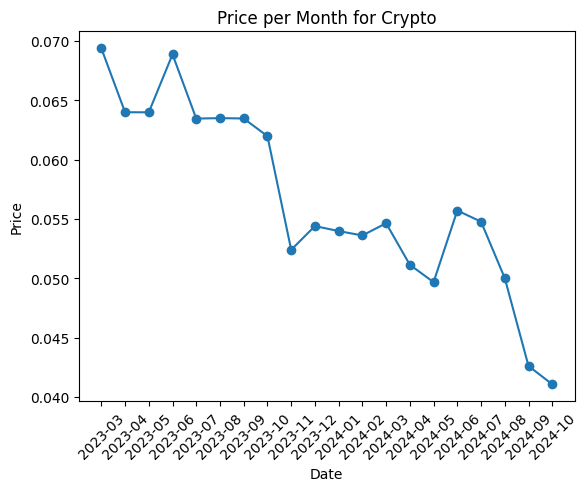

In [36]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Extract keys and values
date = list(crypto.keys())
price = list(crypto.values())
formatted_date = []
for i in date:
    i = pd.to_datetime(i).strftime('%Y-%m')
    formatted_date.append(i)

# Create the plot
plt.plot(formatted_date, price, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.title('Price per Month for Crypto')

# Show the plot
plt.show()
